# Kaggle Bike Sharing Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test =  pd.read_csv("test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
test['casual'] = np.nan
test['registered'] = np.nan
test['count'] = np.nan

In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN


In [7]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 12 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed 

In [8]:
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [9]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB
None


In [10]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['DOW'] = train['datetime'].dt.dayofweek
train['hour'] = train['datetime'].dt.hour


In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,DOW,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,5,4


In [12]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['DOW'] = test['datetime'].dt.dayofweek
test['hour'] = test['datetime'].dt.hour


In [13]:
col = ['workingday','temp','year','month','DOW', 'hour']
x = train[col]
y = train['count']

In [14]:
X_test = test[col]
Y_test = test['count']

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_valid ,Y_train , Y_valid = train_test_split(x,y,test_size = 0.25, random_state = 201)

In [16]:
def RSMLE(predictions , realizations):
    predictions_use = predictions.clip(0)
    rmsle = np.sqrt(np.mean(np.array(np.log(predictions_use+1)-np.log(realizations+1))**2))
    return rmsle

# DecisionTreeRegressor

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dtr = DecisionTreeRegressor(min_samples_split=25 , random_state=201)
dtr_model = dtr.fit(X_train,Y_train)

In [19]:
dtr_pred = dtr_model.predict(X_valid)

In [20]:
pd.DataFrame(dtr_model.feature_importances_,index=col)

,0
workingday,0.036680
temp,0.082574
year,0.096813
month,0.070877
DOW,0.052269
hour,0.660788


Text(0,0.5,'y_valid')

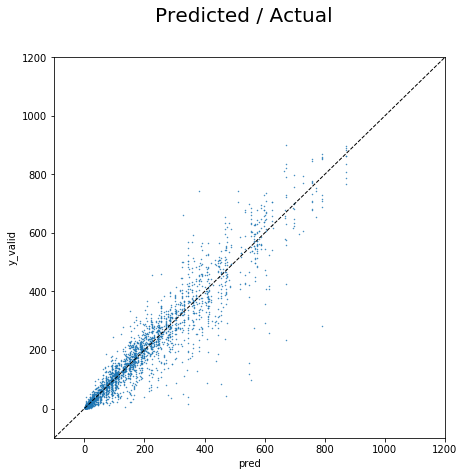

In [21]:
plt.figure(figsize=(7,7))
plt.scatter(dtr_pred,Y_valid, s=0.2)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200],color = 'black', linestyle = '--', linewidth =1)
plt.suptitle("Predicted / Actual", fontsize = 20 )
plt.xlabel('pred')
plt.ylabel("y_valid")

In [22]:
RSMLE(dtr_pred,Y_valid)

0.3962168303827371

# RandomForestRegressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
regress = RandomForestRegressor(n_estimators=500, max_features=4,min_samples_leaf=5, random_state=201)
regress.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=4, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=500, n_jobs=1, oob_score=False, random_state=201,
           verbose=0, warm_start=False)

In [25]:
predict = regress.predict(X_valid)

Text(0,0.5,'y_valid')

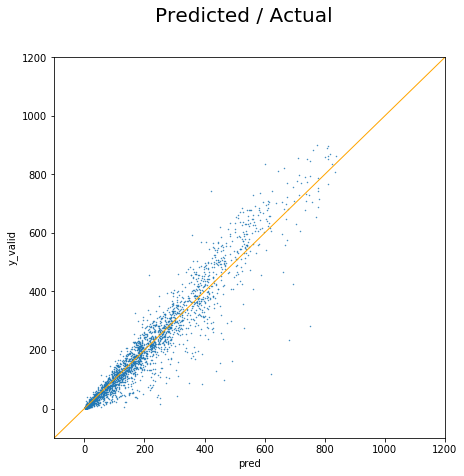

In [26]:
plt.figure(figsize=(7,7))
plt.scatter(predict,Y_valid, s=0.2)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200],color = 'orange', linestyle = '-', linewidth =1)
plt.suptitle("Predicted / Actual", fontsize = 20 )
plt.xlabel('pred')
plt.ylabel("y_valid")

In [27]:
RSMLE(predict,Y_valid)

0.37394316759931356

# XGBoosted Tree Model

In [28]:
import xgboost as xgb

In [29]:
xgb_train = xgb.DMatrix(X_train,label=Y_train)
xgb_valid = xgb.DMatrix(X_valid)

In [31]:
num_round_for_cv = 500
param = { 'max_depth': 6 , 'eta':0.1 , 'seed' : 201 , 'objective' : 'reg:linear'}

In [32]:
xgb.cv(param,xgb_train,num_round_for_cv,nfold=5,show_stdv=False,verbose_eval=True,as_pandas=False)

[0]	train-rmse:241.977	test-rmse:242.025
[1]	train-rmse:222.111	test-rmse:222.281
[2]	train-rmse:204.369	test-rmse:204.639
[3]	train-rmse:188.823	test-rmse:189.225
[4]	train-rmse:174.67	test-rmse:175.215
[5]	train-rmse:162.217	test-rmse:162.879
[6]	train-rmse:151.385	test-rmse:152.148
[7]	train-rmse:141.928	test-rmse:142.842
[8]	train-rmse:132.99	test-rmse:133.889
[9]	train-rmse:124.755	test-rmse:125.804
[10]	train-rmse:117.33	test-rmse:118.617
[11]	train-rmse:110.429	test-rmse:111.875
[12]	train-rmse:104.474	test-rmse:106.082
[13]	train-rmse:98.9797	test-rmse:100.584
[14]	train-rmse:94.1276	test-rmse:95.906
[15]	train-rmse:89.5921	test-rmse:91.4692
[16]	train-rmse:85.817	test-rmse:87.8153
[17]	train-rmse:82.6244	test-rmse:84.707
[18]	train-rmse:79.611	test-rmse:81.7574
[19]	train-rmse:76.653	test-rmse:78.8631
[20]	train-rmse:74.2687	test-rmse:76.6244
[21]	train-rmse:71.8959	test-rmse:74.3497
[22]	train-rmse:70.0149	test-rmse:72.6246
[23]	train-rmse:68.2424	test-rmse:70.9171
[24]	train

[195]	train-rmse:36.7111	test-rmse:48.7622
[196]	train-rmse:36.6553	test-rmse:48.7652
[197]	train-rmse:36.6178	test-rmse:48.7569
[198]	train-rmse:36.5913	test-rmse:48.7551
[199]	train-rmse:36.5309	test-rmse:48.7361
[200]	train-rmse:36.4717	test-rmse:48.7536
[201]	train-rmse:36.4404	test-rmse:48.7433
[202]	train-rmse:36.3905	test-rmse:48.7313
[203]	train-rmse:36.3399	test-rmse:48.7189
[204]	train-rmse:36.2829	test-rmse:48.695
[205]	train-rmse:36.2306	test-rmse:48.6907
[206]	train-rmse:36.2101	test-rmse:48.6935
[207]	train-rmse:36.1689	test-rmse:48.6956
[208]	train-rmse:36.1527	test-rmse:48.6963
[209]	train-rmse:36.1181	test-rmse:48.6885
[210]	train-rmse:36.0629	test-rmse:48.6677
[211]	train-rmse:36.0543	test-rmse:48.6649
[212]	train-rmse:36.0205	test-rmse:48.6541
[213]	train-rmse:35.9945	test-rmse:48.6615
[214]	train-rmse:35.9575	test-rmse:48.662
[215]	train-rmse:35.908	test-rmse:48.6595
[216]	train-rmse:35.8745	test-rmse:48.6597
[217]	train-rmse:35.8539	test-rmse:48.6638
[218]	train-rm

[387]	train-rmse:30.2835	test-rmse:48.0744
[388]	train-rmse:30.2329	test-rmse:48.0602
[389]	train-rmse:30.1981	test-rmse:48.0587
[390]	train-rmse:30.1553	test-rmse:48.0581
[391]	train-rmse:30.1293	test-rmse:48.0579
[392]	train-rmse:30.0956	test-rmse:48.0551
[393]	train-rmse:30.0492	test-rmse:48.0642
[394]	train-rmse:30.0193	test-rmse:48.0691
[395]	train-rmse:29.9815	test-rmse:48.0819
[396]	train-rmse:29.9566	test-rmse:48.0854
[397]	train-rmse:29.9257	test-rmse:48.0889
[398]	train-rmse:29.9013	test-rmse:48.0941
[399]	train-rmse:29.8754	test-rmse:48.0926
[400]	train-rmse:29.8586	test-rmse:48.0914
[401]	train-rmse:29.8368	test-rmse:48.0899
[402]	train-rmse:29.8163	test-rmse:48.0959
[403]	train-rmse:29.7897	test-rmse:48.0972
[404]	train-rmse:29.7758	test-rmse:48.0962
[405]	train-rmse:29.7668	test-rmse:48.0943
[406]	train-rmse:29.7496	test-rmse:48.1023
[407]	train-rmse:29.7238	test-rmse:48.1064
[408]	train-rmse:29.696	test-rmse:48.1157
[409]	train-rmse:29.6621	test-rmse:48.1161
[410]	train-

{'test-rmse-mean': [242.0254516,
  222.2813052,
  204.6391662,
  189.2245666,
  175.21537460000002,
  162.87934579999998,
  152.147818,
  142.841556,
  133.8894134,
  125.80371419999999,
  118.61729580000001,
  111.87476039999999,
  106.08201160000002,
  100.58417960000001,
  95.90604100000002,
  91.4691772,
  87.81532000000001,
  84.7069626,
  81.7573606,
  78.86308899999999,
  76.6244034,
  74.349713,
  72.6246322,
  70.9171296,
  69.1231676,
  67.3277468,
  65.5976336,
  64.0039962,
  62.67817219999999,
  61.81903179999999,
  60.891041599999994,
  59.850589,
  59.2706322,
  58.6344964,
  58.1227256,
  57.54877700000001,
  57.072204,
  56.7733154,
  56.419161200000005,
  56.12215200000001,
  55.81950680000001,
  55.450708000000006,
  55.1231552,
  54.9379028,
  54.70505039999999,
  54.5294976,
  54.440232,
  54.229795,
  54.051330799999995,
  53.9043654,
  53.724171999999996,
  53.566343,
  53.4529808,
  53.22605600000001,
  53.0385734,
  52.9132996,
  52.833557199999994,
  52.686571

In [35]:
num_round = 400
xg_model = xgb.train(param,xgb_train,num_round)
xg_pred = xg_model.predict(xgb_valid)

In [36]:
xg_model.get_fscore()

{'DOW': 3600,
 'hour': 6278,
 'month': 3312,
 'temp': 5497,
 'workingday': 1090,
 'year': 1696}

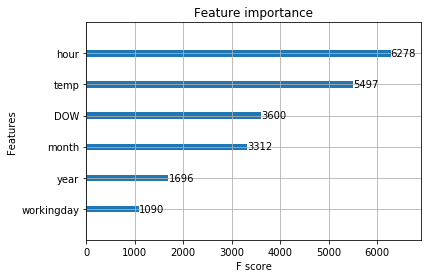

In [37]:
xgb.plot_importance(xg_model)

Text(0,0.5,'y_valid')

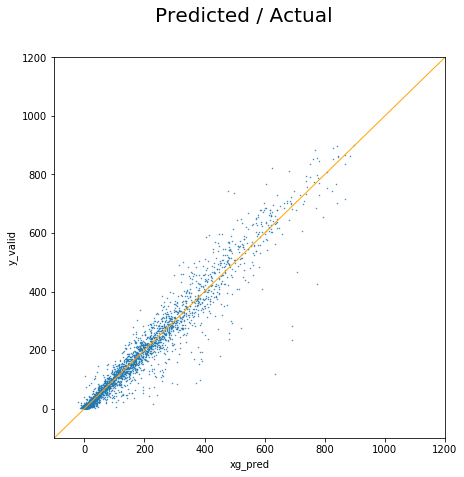

In [38]:
plt.figure(figsize=(7,7))
plt.scatter(xg_pred,Y_valid, s=0.2)
plt.xlim(-100,1200)
plt.ylim(-100,1200)
plt.plot([-100,1200],[-100,1200],color = 'orange', linestyle = '-', linewidth =1)
plt.suptitle("Predicted / Actual", fontsize = 20 )
plt.xlabel('xg_pred')
plt.ylabel("y_valid")

In [39]:
RSMLE(xg_pred,Y_valid)

0.47394880279312734

# Making Predictions for testing set

In [40]:
test_dt =  dtr.fit(x,y)
predict_dt = test_dt.predict(X_test)
dt_clipped = pd.Series(predict_dt.clip(0))

In [41]:
test_rf =  regress.fit(x,y)
predict_rt = test_rf.predict(X_test)
rf_clipped = pd.Series(predict_rt.clip(0))

In [42]:
xgbtrain = xgb.DMatrix(x,label=y)
xgbtest = xgb.DMatrix(X_test)
xgmodel = xgb.train(param,xgbtrain,num_round)
xgpred = xgmodel.predict(xgbtest)
xg_clipped = pd.Series(xgpred.clip(0))

# Sample Submission

In [43]:
Submission = pd.read_csv('sampleSubmission.csv')

In [44]:
Submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [45]:
decisiontree = Submission
decisiontree['count'] = rf_clipped
decisiontree.to_csv('DecisionTreeSubmission.csv',index=False)

In [46]:
randomforest = Submission
randomforest['count'] = dt_clipped
randomforest.to_csv('RandomForestSubmission.csv',index=False)

In [47]:
xgboost = Submission
xgboost['count'] = xg_clipped
xgboost.to_csv('XGboostSubmission.csv',index=False)